In [1]:
#import necessary libraries
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats
from scipy.stats import linregress


In [2]:
#load cdc data 
cdc_pop_load = "CDCPopulationGender.csv"

cdc_pop_data = pd.read_csv(cdc_pop_load)

cdc_pop_df = cdc_pop_data 

cdc_pop_df.head()

#delete extra year column
del cdc_pop_df['Yearly July 1st Estimates Code']

cdc_pop_df = cdc_pop_df.rename(columns={'Yearly July 1st Estimates':'Year'})


#make state lower
cdc_pop_df['State']=cdc_pop_df['State'].str.lower()

cdc_pop_df.head()

#clean up fields 
del cdc_pop_df["Gender Code"]

In [3]:
#create data frame for females
female_df = cdc_pop_df.loc[cdc_pop_df['Gender']=="Female"]

female_df
#create data frame for males
male_df =cdc_pop_df.loc[cdc_pop_df['Gender']=="Male"]

male_df


,State,State Code,Gender,Year,Population
30,alabama,1,Male,1990,1525176.0
31,alabama,1,Male,1991,1545123.0
32,alabama,1,Male,1992,1569192.0
33,alabama,1,Male,1993,1595125.0
34,alabama,1,Male,1994,1616332.0
...,...,...,...,...,...
3055,wyoming,56,Male,2015,242678.0
3056,wyoming,56,Male,2016,242087.0
3057,wyoming,56,Male,2017,240232.0
3058,wyoming,56,Male,2018,240123.0


In [4]:
#merge together with new columns 
genders_data = pd.merge(female_df,male_df, how="inner",on=['State','Year'])

genders_data.head()

#rename columns
genders_data = genders_data.rename(columns={'Population_x':'Females',
                                       'Population_y': 'Males',
                                           "State Code_x":"State Code",})

genders_data.head()

#delete unnecessary fields
del genders_data['Gender_x']
del genders_data['Gender_y']
del genders_data['State Code_y']

#calculate total population
genders_data['Total Population'] = genders_data['Females'] + genders_data['Males']
genders_data['% Female']= genders_data['Females']/genders_data['Total Population']
genders_data['% Male'] = genders_data['Males']/genders_data['Total Population']

#print head
genders_data

,State,State Code,Year,Females,Males,Total Population,% Female,% Male
0,alabama,1,1990,1712799.0,1525176.0,3237975.0,0.528972,0.471028
1,alabama,1,1991,1733472.0,1545123.0,3278595.0,0.528724,0.471276
2,alabama,1,1992,1755757.0,1569192.0,3324949.0,0.528055,0.471945
3,alabama,1,1993,1781034.0,1595125.0,3376159.0,0.527533,0.472467
4,alabama,1,1994,1802008.0,1616332.0,3418340.0,0.527159,0.472841
...,...,...,...,...,...,...,...,...
1525,wyoming,56,2015,232946.0,242678.0,475624.0,0.489769,0.510231
1526,wyoming,56,2016,232772.0,242087.0,474859.0,0.490192,0.509808
1527,wyoming,56,2017,231835.0,240232.0,472067.0,0.491106,0.508894
1528,wyoming,56,2018,232222.0,240123.0,472345.0,0.491636,0.508364


In [5]:
#load csv file
alcohol_data_load = "Per Capita Alcohol Consumption 1977_2018.csv"

alcohol_data = pd.read_csv(alcohol_data_load)
alcohol_data_df = alcohol_data

#print header
alcohol_data_df.head()

,state,year,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,2018,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1,alabama,2017,1.07,0.26,0.67,1.99,253.629630,51.596899,139.107867,424.533333
2,alabama,2016,1.09,0.26,0.65,2.01,258.370370,51.596899,134.955393,428.800000
3,alabama,2015,1.11,0.26,0.64,2.01,263.111111,51.596899,132.879156,428.800000
4,alabama,2014,1.13,0.25,0.62,2.00,267.851852,49.612403,128.726683,426.666667


In [6]:
#merge gender data with alcohol consumption data
gender_alc_data = pd.merge(genders_data,alcohol_data, how="inner",left_on=['State','Year'],right_on=['state','year'])


#delete repeart fields
del gender_alc_data['state']
del gender_alc_data['year']

gender_alc_data.head()

,State,State Code,Year,Females,Males,Total Population,% Female,% Male,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,1,1990,1712799.0,1525176.0,3237975.0,0.528972,0.471028,1.12,0.18,0.61,1.92,265.481481,35.720930,126.650446,409.600000
1,alabama,1,1991,1733472.0,1545123.0,3278595.0,0.528724,0.471276,1.00,0.17,0.59,1.76,237.037037,33.736434,122.497972,375.466667
2,alabama,1,1992,1755757.0,1569192.0,3324949.0,0.528055,0.471945,1.02,0.19,0.59,1.79,241.777778,37.705426,122.497972,381.866667
3,alabama,1,1993,1781034.0,1595125.0,3376159.0,0.527533,0.472467,1.14,0.17,0.56,1.86,270.222222,33.736434,116.269262,396.800000
4,alabama,1,1994,1802008.0,1616332.0,3418340.0,0.527159,0.472841,1.16,0.17,0.54,1.87,274.962963,33.736434,112.116788,398.933333


In [7]:
#load csv
beapopulation_data_load = "Outputpopulation.csv"

#read csv
population_data = pd.read_csv(beapopulation_data_load)
population_data.head()

#drop NAs
population_data.dropna(subset = ["BEA Population"], inplace=True)

#make state lowercase
population_data['GeoName']=population_data['GeoName'].str.lower()


#convert BEA population to integer
population_data["BEA Population"]=population_data["BEA Population"].astype(int)

#filter for 1990 and greater
population_data = population_data[population_data['Year']>=1990]





In [8]:
#load per capita income data
beaincome_data_load = 'Outputpercapitaincome.csv'

#read csv
income_data = pd.read_csv(beaincome_data_load)

#make state lowercase
income_data['GeoName']=income_data['GeoName'].str.lower()

#drop NAs 
income_data.dropna(subset = ["Per Capita Personal Income"], inplace=True)

#filter for 1990 and greater
income_data = income_data[income_data['Year']>=1990]


income_data.head()

,GeoFips,GeoName,Year,Per Capita Personal Income
1200,0,united states,1990,19621.0
1201,1000,alabama,1990,15861.0
1202,2000,alaska,1990,23213.0
1203,4000,arizona,1990,17323.0
1204,5000,arkansas,1990,14622.0


In [9]:
#merge data sets
bea_data = pd.merge(income_data,population_data, how="inner",left_on=['GeoName','Year'],right_on =['GeoName','Year'])


bea_data.head()


#delete columns not needed
del bea_data['GeoFips_x']
del bea_data['GeoFips_y']



#rename state column
bea_data = bea_data.rename(columns={'GeoName':'State'})

bea_data.head()

,State,Year,Per Capita Personal Income,BEA Population
0,united states,1990,19621.0,249622814
1,alabama,1990,15861.0,4050055
2,arizona,1990,17323.0,3684097
3,arkansas,1990,14622.0,2356586
4,california,1990,21485.0,29959515


In [10]:
all_data = pd.merge(bea_data,gender_alc_data, how="inner",left_on=['State','Year'],right_on =['State','Year'])

all_data.head()




,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
0,alabama,1990,15861.0,4050055,1,1712799.0,1525176.0,3237975.0,0.528972,0.471028,1.12,0.18,0.61,1.92,265.481481,35.720930,126.650446,409.600000
1,arizona,1990,17323.0,3684097,4,1469424.0,1408380.0,2877804.0,0.510606,0.489394,1.59,0.37,0.80,2.77,376.888889,73.426357,166.098946,590.933333
2,arkansas,1990,14622.0,2356586,5,985649.0,889120.0,1874769.0,0.525744,0.474256,1.12,0.13,0.61,1.86,265.481481,25.798450,126.650446,396.800000
3,california,1990,21485.0,29959515,6,11823050.0,11709410.0,23532460.0,0.502415,0.497585,1.32,0.59,0.87,2.78,312.888889,117.085271,180.632603,593.066667
4,colorado,1990,19853.0,3307618,8,1323273.0,1276027.0,2599300.0,0.509088,0.490912,1.35,0.29,0.75,2.39,320.000000,57.550388,155.717762,509.866667


In [11]:
#find max year
max_year = all_data['Year'].max()

max_year

2018

In [12]:
#create df for max year analysis
max_year_df = all_data[all_data['Year']==2018]

max_year_df.head()

,State,Year,Per Capita Personal Income,BEA Population,State Code,Females,Males,Total Population,% Female,% Male,ethanol_beer_gallons_per_capita,ethanol_wine_gallons_per_capita,ethanol_spirit_gallons_per_capita,ethanol_all_drinks_gallons_per_capita,number_of_beers,number_of_glasses_wine,number_of_shots_liquor,number_of_drinks_total
1323,alabama,2018,42710.0,4887681,1,2111195.0,1934462.0,4045657.0,0.521842,0.478158,1.04,0.26,0.69,1.99,246.518518,51.596899,143.260341,424.533333
1324,arizona,2018,44597.0,7158024,4,2980282.0,2912309.0,5892591.0,0.505768,0.494232,1.08,0.39,0.79,2.25,256.000000,77.395349,164.022709,480.000000
1325,arkansas,2018,43325.0,3009733,5,1266004.0,1199293.0,2465297.0,0.513530,0.486470,0.90,0.23,0.64,1.78,213.333333,45.643411,132.879156,379.733333
1326,california,2018,63720.0,39461588,6,16444369.0,16060513.0,32504882.0,0.505905,0.494095,1.00,0.62,0.87,2.49,237.037037,123.038760,180.632603,531.200000
1327,colorado,2018,58896.0,5691287,8,2348485.0,2367410.0,4715895.0,0.497993,0.502007,1.14,0.52,1.23,2.88,270.222222,103.193798,255.377129,614.400000


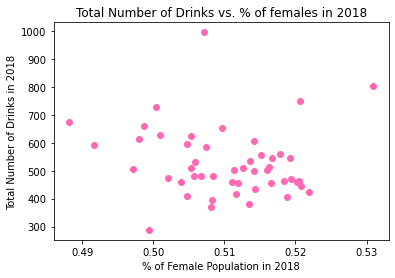

In [35]:
#females and total drinking in 2018

plt.scatter(max_year_df['% Female'],max_year_df["number_of_drinks_total"],color='hotpink')

plt.xlabel("% of Female Population in 2018")
plt.ylabel("Total Number of Drinks in 2018")
plt.title('Total Number of Drinks vs. % of females in 2018')

plt.show()


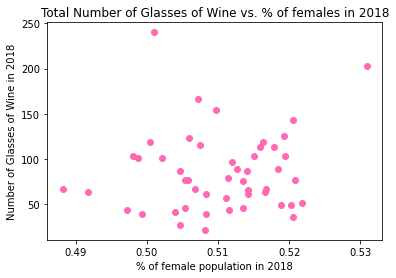

In [39]:
#females and wine 2018
plt.scatter(max_year_df['% Female'],max_year_df["number_of_glasses_wine"],color='hotpink')


plt.xlabel("% of female population in 2018")
plt.ylabel("Number of Glasses of Wine in 2018")
plt.title('Total Number of Glasses of Wine vs. % of females in 2018')

plt.show()


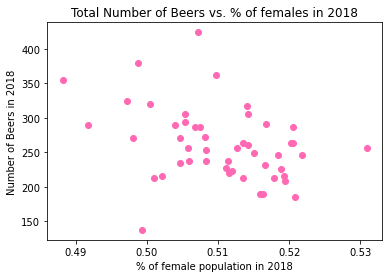

In [43]:
#females and beer in 2018
plt.scatter(max_year_df['% Female'],max_year_df["number_of_beers"],color='hotpink')


plt.xlabel("% of female population in 2018")
plt.ylabel("Number of Beers in 2018")
plt.title('Total Number of Beers vs. % of females in 2018')

plt.show()

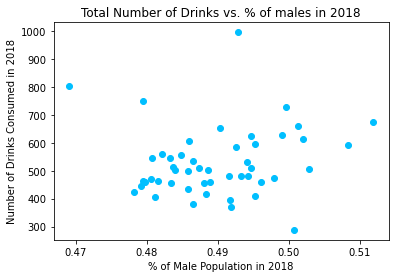

In [44]:
#males and total drinks
plt.scatter(max_year_df['% Male'],max_year_df["number_of_drinks_total"],color='deepskyblue')


plt.xlabel("% of Male Population in 2018")
plt.ylabel("Number of Drinks Consumed in 2018")
plt.title('Total Number of Drinks vs. % of males in 2018')


plt.show()

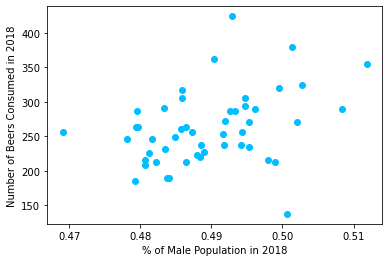

In [41]:
#males and drinks in 2018
plt.scatter(max_year_df['% Male'],max_year_df["number_of_beers"],color='deepskyblue')


plt.xlabel("% of Male Population in 2018")
plt.ylabel("Number of Beers Consumed in 2018")


plt.show()

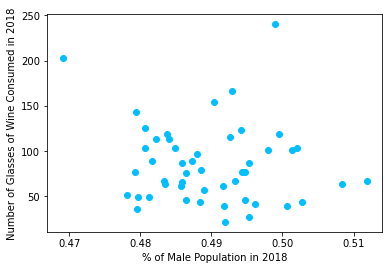

In [45]:
#males and drinks in 2018
plt.scatter(max_year_df['% Male'],max_year_df["number_of_glasses_wine"],color='deepskyblue')


plt.xlabel("% of Male Population in 2018")
plt.ylabel("Number of Glasses of Wine Consumed in 2018")


plt.show()

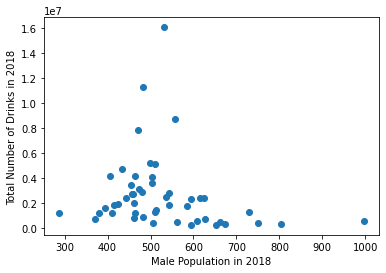

In [17]:
#males and total drinking in 2018
plt.scatter(max_year_df["number_of_drinks_total"],max_year_df['Males'])

plt.xlabel("Male Population in 2018")
plt.ylabel("Total Number of Drinks in 2018")

plt.show()


Text(0, 0.5, 'Per Capita Personal Income')

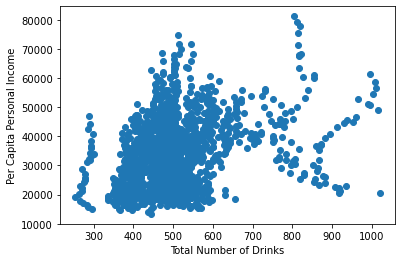

In [18]:
plt.scatter(all_data["number_of_drinks_total"],all_data['Per Capita Personal Income'])

plt.xlabel("Total Number of Drinks")
plt.ylabel("Per Capita Personal Income")

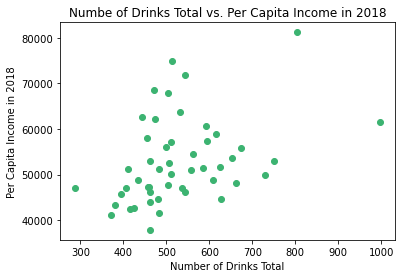

In [46]:
#plot per capita personal income vs. number of drinks total in 2018
plt.scatter(max_year_df["number_of_drinks_total"],max_year_df['Per Capita Personal Income'],color="mediumseagreen")

plt.xlabel("Number of Drinks Total")
plt.ylabel("Per Capita Income in 2018")
plt.title('Numbe of Drinks Total vs. Per Capita Income in 2018')

plt.show()

The correlation between both factors is 0.38
y = 28.81 x + 37647.2


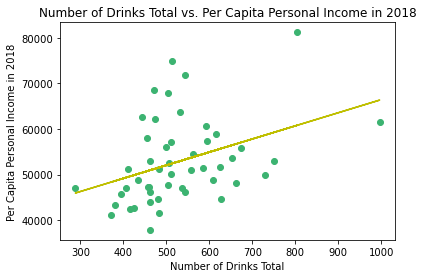

In [53]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
x_values = max_year_df["number_of_drinks_total"]
y_values = max_year_df['Per Capita Personal Income']

#calculate and print correlation coefficient
correlation = stats.pearsonr(x_values,y_values)
print(f"The correlation between both factors is {round(correlation[0],2)}")

#calculation linear regression
(slope, intercept, rvalue, pvalue, stderr)=linregress(x_values,y_values)

regress_values = x_values * slope + intercept

line_eq = f"y = {round(slope,2)} x + {round(intercept,2)}"

#print line equation
print(line_eq)

#plot scatter and line
plt.scatter(x_values,y_values,color="mediumseagreen")
plt.plot(x_values,regress_values,'y-')
plt.xlabel('Number of Drinks Total')
plt.ylabel('Per Capita Personal Income in 2018')
plt.title('Number of Drinks Total vs. Per Capita Personal Income in 2018')
plt.show()

In [ ]:
#take sample state
illinois_data = all_data[all_data['State']=="illinois"]

#plot both populations
x_value = illinois_data['Year']
y_1 = illinois_data['BEA Population']
y_2 = illinois_data['Total Population']
plt.plot(x_value,y_1,marker='', color='olive', linewidth=2)
plt.plot(x_value,y_2, marker='', color='olive', linewidth=2, linestyle='dashed')
plt.show()